## Análisis del Problema

### Autores
   * Daniel Vargas

## Librerías

In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

from sklearn.linear_model import LinearRegression

## Entendimiento de los Datos

In [2]:
!wget https://raw.githubusercontent.com/LDVargas/IA_Datasets/master/walmart-dataset.csv

--2021-10-03 00:56:06--  https://raw.githubusercontent.com/LDVargas/IA_Datasets/master/walmart-dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12842546 (12M) [text/plain]
Saving to: ‘walmart-dataset.csv’

walmart-dataset.csv 100%[===================>]  12.25M  --.-KB/s    in 0.06s   

2021-10-03 00:56:06 (211 MB/s) - ‘walmart-dataset.csv’ saved [12842546/12842546]



In [3]:
data = pd.read_csv('/content/walmart-dataset.csv')

In [4]:
data["Date"]=pd.to_datetime(data["Date"])

In [5]:
#shape
data.shape

(421570, 5)

In [6]:
#head of data

data.head()

Store  Dept       Date  Weekly_Sales  IsHoliday
0      1     1 2010-02-05      24924.50      False
1      1     1 2010-02-12      46039.49       True
2      1     1 2010-02-19      41595.55      False
3      1     1 2010-02-26      19403.54      False
4      1     1 2010-03-05      21827.90      False

In [7]:
#tail of data

data.tail()

Store  Dept       Date  Weekly_Sales  IsHoliday
421565     45    98 2012-09-28        508.37      False
421566     45    98 2012-10-05        628.10      False
421567     45    98 2012-10-12       1061.02      False
421568     45    98 2012-10-19        760.01      False
421569     45    98 2012-10-26       1076.80      False

In [8]:
#now lets check shape
data.shape

#lets verify whether nan is present in columns
'nan' in data.columns
#so its proved that nan is not in columns 

False

In [9]:
# Numero de registros del dataset
print("Cantidad de registros:",len(data))
# Cantidad de columnas del dataset
print("Cantidad de columnas:",len(data.columns))
# Tipos de datos del dataset
print("Tipo de datos:",data.dtypes.unique())
# Tamaño del daset
print("Filas y columnas:",data.shape)

Cantidad de registros: 421570
Cantidad de columnas: 5
Tipo de datos: [dtype('int64') dtype('<M8[ns]') dtype('float64') dtype('bool')]
Filas y columnas: (421570, 5)


In [10]:
data.head()

Store  Dept       Date  Weekly_Sales  IsHoliday
0      1     1 2010-02-05      24924.50      False
1      1     1 2010-02-12      46039.49       True
2      1     1 2010-02-19      41595.55      False
3      1     1 2010-02-26      19403.54      False
4      1     1 2010-03-05      21827.90      False

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB


In [12]:
cols = ['Store', 'Dept', 'IsHoliday']
data.drop(cols, axis=1, inplace=True)

In [13]:
data = data.sort_values('Date')
data.isnull().sum()

Date            0
Weekly_Sales    0
dtype: int64

In [14]:
data = data.groupby('Date')['Weekly_Sales'].sum().reset_index()

In [15]:
data

Date  Weekly_Sales
0   2010-02-05   49750740.50
1   2010-02-12   48336677.63
2   2010-02-19   48276993.78
3   2010-02-26   43968571.13
4   2010-03-05   46871470.30
..         ...           ...
138 2012-09-28   43734899.40
139 2012-10-05   47566639.31
140 2012-10-12   46128514.25
141 2012-10-19   45122410.57
142 2012-10-26   45544116.29

[143 rows x 2 columns]

In [16]:
data = data.set_index('Date')
data.index

DatetimeIndex(['2010-02-05', '2010-02-12', '2010-02-19', '2010-02-26',
               '2010-03-05', '2010-03-12', '2010-03-19', '2010-03-26',
               '2010-04-02', '2010-04-09',
               ...
               '2012-08-24', '2012-08-31', '2012-09-07', '2012-09-14',
               '2012-09-21', '2012-09-28', '2012-10-05', '2012-10-12',
               '2012-10-19', '2012-10-26'],
              dtype='datetime64[ns]', name='Date', length=143, freq=None)

In [17]:
data

Weekly_Sales
Date                    
2010-02-05   49750740.50
2010-02-12   48336677.63
2010-02-19   48276993.78
2010-02-26   43968571.13
2010-03-05   46871470.30
...                  ...
2012-09-28   43734899.40
2012-10-05   47566639.31
2012-10-12   46128514.25
2012-10-19   45122410.57
2012-10-26   45544116.29

[143 rows x 1 columns]

## Exploración de los Datos

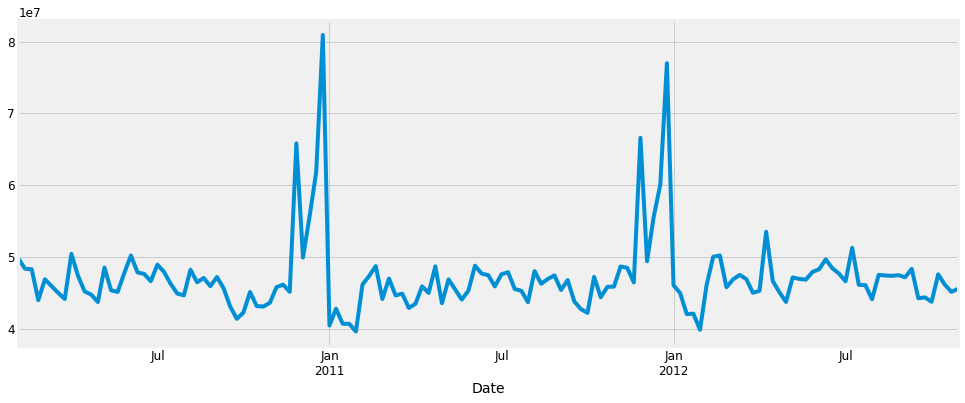

In [18]:
y = data['Weekly_Sales'].resample('W').mean()
y.plot(figsize=(15, 6))
plt.show()

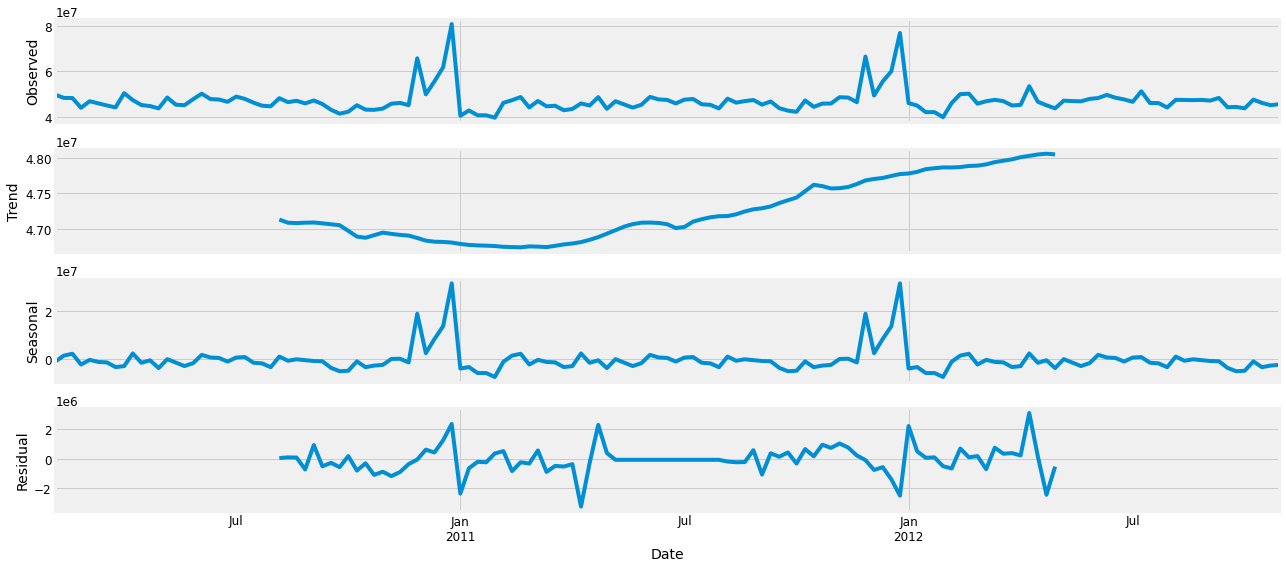

In [19]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

## Modelo de Machine Learning

In [20]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2],52) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 52)
SARIMAX: (0, 0, 1) x (0, 1, 0, 52)
SARIMAX: (0, 1, 0) x (0, 1, 1, 52)
SARIMAX: (0, 1, 0) x (1, 0, 0, 52)


In [21]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 52) - AIC:5424.479977888627
ARIMA(0, 0, 0)x(0, 1, 0, 52) - AIC:2876.06734674439
ARIMA(0, 0, 0)x(1, 0, 0, 52) - AIC:2898.7387277171397
ARIMA(0, 0, 0)x(1, 1, 0, 52) - AIC:1241.2066753070658
ARIMA(0, 0, 1)x(0, 0, 0, 52) - AIC:5293.999743029382
ARIMA(0, 0, 1)x(0, 1, 0, 52) - AIC:2829.8162871991244
ARIMA(0, 0, 1)x(1, 0, 0, 52) - AIC:3389.809601700207
ARIMA(0, 0, 1)x(1, 1, 0, 52) - AIC:1243.2407370920419
ARIMA(0, 1, 0)x(0, 0, 0, 52) - AIC:4816.399537249527
ARIMA(0, 1, 0)x(0, 1, 0, 52) - AIC:2874.865206183449
ARIMA(0, 1, 0)x(1, 0, 0, 52) - AIC:2876.901105973954
ARIMA(0, 1, 0)x(1, 1, 0, 52) - AIC:1226.170188590427
ARIMA(0, 1, 1)x(0, 0, 0, 52) - AIC:4747.165846254834
ARIMA(0, 1, 1)x(0, 1, 0, 52) - AIC:2809.984353086046
ARIMA(0, 1, 1)x(1, 0, 0, 52) - AIC:2976.445414645286
ARIMA(0, 1, 1)x(1, 1, 0, 52) - AIC:1206.253979419189
ARIMA(1, 0, 0)x(0, 0, 0, 52) - AIC:4850.865601404344
ARIMA(1, 0, 0)x(0, 1, 0, 52) - AIC:2859.0055151150304
ARIMA(1, 0, 0)x(1, 0, 0, 52) - AIC:2997.70

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 1, 0, 52) - AIC:1200.4197757656937
ARIMA(1, 1, 0)x(0, 0, 0, 52) - AIC:4792.141766433102
ARIMA(1, 1, 0)x(0, 1, 0, 52) - AIC:2851.497721674754
ARIMA(1, 1, 0)x(1, 0, 0, 52) - AIC:2949.071193464568
ARIMA(1, 1, 0)x(1, 1, 0, 52) - AIC:1185.6770130227733
ARIMA(1, 1, 1)x(0, 0, 0, 52) - AIC:4747.153625561054
ARIMA(1, 1, 1)x(0, 1, 0, 52) - AIC:2811.616608795639
ARIMA(1, 1, 1)x(1, 0, 0, 52) - AIC:2944.541619007168
ARIMA(1, 1, 1)x(1, 1, 0, 52) - AIC:1176.9488022962657


In [22]:
mod = sm.tsa.statespace.SARIMAX(y,
                                #order=(1, 1, 1),  #original
                                #seasonal_order=(1, 1, 0, 12), #original
                                order=(1, 1, 1),#
                                seasonal_order=(1, 1, 0, 52),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0052      0.349      0.015      0.988      -0.679       0.689
ma.L1         -0.9179      0.177     -5.188      0.000      -1.265      -0.571
ar.S.L52      -0.0197      0.090     -0.220      0.826      -0.196       0.156
sigma2      4.007e+12    6.1e-14   6.57e+25      0.000    4.01e+12    4.01e+12


## Evaluación

In [29]:
data

Weekly_Sales
Date                    
2010-02-05   49750740.50
2010-02-12   48336677.63
2010-02-19   48276993.78
2010-02-26   43968571.13
2010-03-05   46871470.30
...                  ...
2012-09-28   43734899.40
2012-10-05   47566639.31
2012-10-12   46128514.25
2012-10-19   45122410.57
2012-10-26   45544116.29

[143 rows x 1 columns]

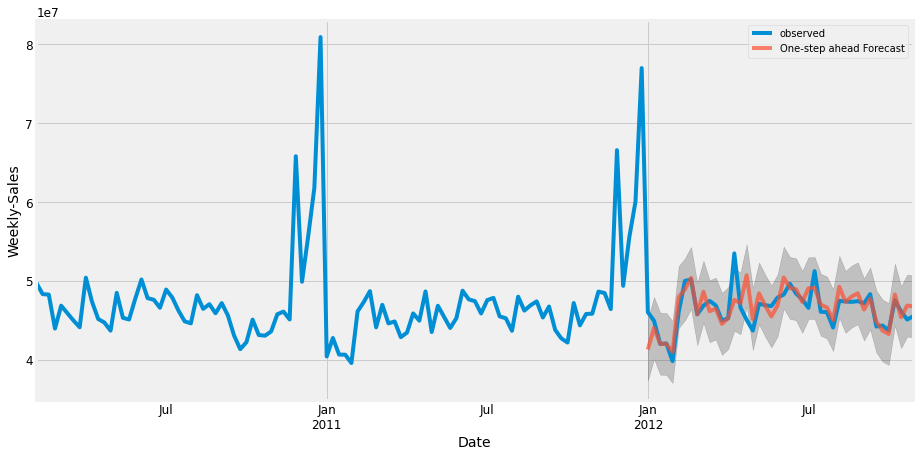

In [42]:
pred = results.get_prediction(start=pd.to_datetime('2012-01-01'), dynamic=False)#2017-05-12
pred_ci = pred.conf_int()
ax = y['2010':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Weekly-Sales')
plt.legend()
plt.show()

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = y['2010-02-12':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 3144080119058.17


In [ ]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 1773155.41


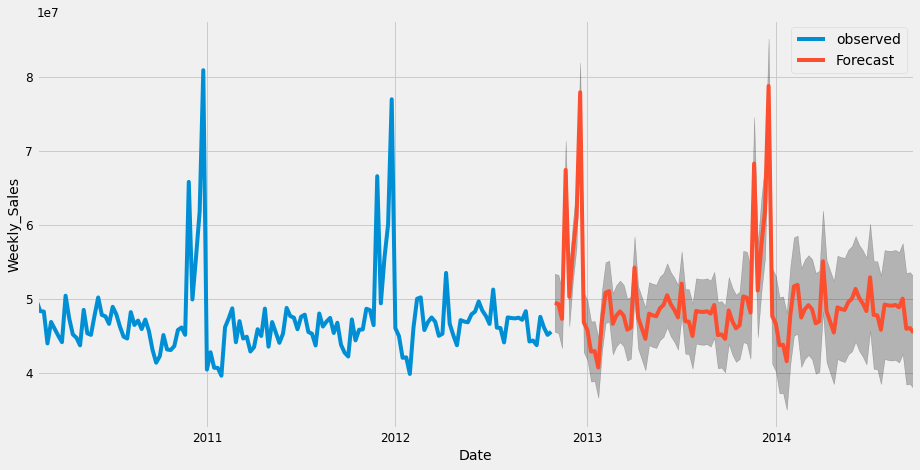

In [ ]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Weekly_Sales')
plt.legend()
plt.show()

In [ ]:
pred_ci

lower Weekly_Sales  upper Weekly_Sales
2012-11-04        4.554159e+07        5.338800e+07
2012-11-11        4.536156e+07        5.323775e+07
2012-11-18        4.333353e+07        5.123628e+07
2012-11-25        6.348560e+07        7.141481e+07
2012-12-02        4.629486e+07        5.425043e+07
...                        ...                 ...
2014-08-31        4.138117e+07        5.632207e+07
2014-09-07        4.252835e+07        5.752410e+07
2014-09-14        3.841896e+07        5.346938e+07
2014-09-21        3.849692e+07        5.360181e+07
2014-09-28        3.785202e+07        5.301118e+07

[100 rows x 2 columns]

## Resultados

El set de datos ya viene lo suficientemente acomodado y existen suficientes datos en tiempo como para poder aplicar una serie de tiempo. Para poder predecirlo se utiliza las ventas semanales. Como resultado el modelo se ajusta bien con los datos y producto de esto se pueden realizar predicciones del precio del bitcoin ingresando a cuantas semanas se quiere predecir el precio o ingresando una fecha que corresponda a un viernes.

In [ ]:
'''import pickle
with open('walmart_sales.sav','wb') as f:
    pickle.dump(pred,f)'''

import pickle
filename = 'walmart_sales'
pickle.dump(results, open(filename, 'wb'))